In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
x_train_full.dtype

dtype('uint8')

In [0]:
x_valid,x_train = x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [9]:
y_train[0]

4

In [10]:
class_names[y_train[0]]

'Coat'

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation=keras.activations.relu))
model.add(keras.layers.Dense(10,activation=keras.activations.softmax))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1

In [19]:
hidden1.name

'dense_5'

In [20]:
model.get_layer('dense_5') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01613155, -0.06325924,  0.00186714, ..., -0.05959021,
        -0.06626473, -0.01005651],
       [ 0.01245005, -0.02880124,  0.00344512, ..., -0.05100029,
         0.00958265, -0.06289032],
       [ 0.05820186,  0.04099931,  0.0455907 , ..., -0.07122866,
         0.04399765, -0.00809905],
       ...,
       [ 0.05082564,  0.03107188, -0.0150063 , ...,  0.07278489,
        -0.04666176,  0.01340886],
       [-0.02691079, -0.03863549, -0.06348882, ..., -0.01074788,
         0.03415331,  0.04580327],
       [ 0.01966931, -0.04285022, -0.01841397, ...,  0.04415841,
         0.03834014, -0.01653895]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

###编译模型

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

In [27]:
history = model.fit(x_train,y_train,epochs=30,
                    validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 118us/sample - loss: 0.7249 - accuracy: 0.7613 - val_loss: 0.5056 - val_accuracy: 0.8248
Epoch 2/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4896 - accuracy: 0.8289 - val_loss: 0.4628 - val_accuracy: 0.8360
Epoch 3/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.4451 - accuracy: 0.8437 - val_loss: 0.4086 - val_accuracy: 0.8630
Epoch 4/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4177 - accuracy: 0.8527 - val_loss: 0.4308 - val_accuracy: 0.8400
Epoch 5/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.3973 - accuracy: 0.8595 - val_loss: 0.3823 - val_accuracy: 0.8670
Epoch 6/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.3810 - accuracy: 0.8652 - val_loss: 0.3818 - val_accuracy: 0.8662
Epoch 7/30
55000/55000 [==============================] 

In [29]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 55000,
 'steps': 1719,
 'verbose': 0}

In [30]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [34]:
history.history.items()

dict_items([('loss', [0.7249191380110654, 0.4896330278309909, 0.4451052401629361, 0.4177077196034518, 0.3972648292584853, 0.38100514443570915, 0.368115224628015, 0.35607155540639707, 0.3449737898566506, 0.3352403730175712, 0.3275960405696522, 0.31913690539056605, 0.31170071640231395, 0.3053732081326571, 0.29828608162836595, 0.29277536032850093, 0.28602922304218464, 0.2807058789318258, 0.2751408359679309, 0.27062239792346954, 0.2657609159220349, 0.26115155117728495, 0.256622176167098, 0.25174938879121433, 0.24798061318180778, 0.24359393428238954, 0.23884463960365815, 0.23532412944598632, 0.23170212085463784, 0.22775504595041274]), ('accuracy', [0.76125455, 0.8288909, 0.84369093, 0.8527455, 0.85954547, 0.86521816, 0.86863637, 0.87356365, 0.8768, 0.8805091, 0.8824, 0.88616365, 0.88772726, 0.8898727, 0.8928546, 0.8944727, 0.89592725, 0.8984727, 0.90034544, 0.90145457, 0.9029818, 0.9058545, 0.90703636, 0.90834546, 0.9106, 0.91214544, 0.9140546, 0.91612726, 0.9166545, 0.91767275]), ('val_los

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


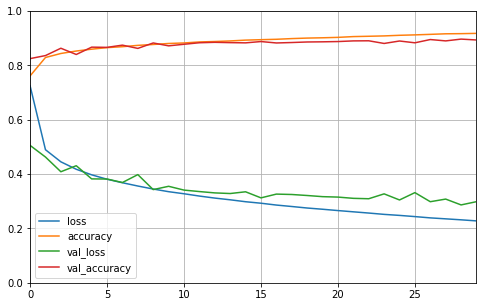

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [0]:
###使用模型进行预测

In [38]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
x_new.shape

(3, 28, 28)

In [41]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1])

In [0]:
import numpy as np

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)